# Exo 1


Soient λ une valeur propre
 <i>A</i> et <i>x</i> = (<i>x</i><sub><i>1</i></sub>, ..., <i>x</i><sub><i>n</i></sub>) 
    un vecteur propre associé. 
    
Pour $i$ compris entre 1 et $n$, on a
    
$(\lambda -a_{ii})x_{i} = \sum_{j\neq i} a_{ij} x_{j}$


Choisissons un indice i pour lequel le module de $x_i$ est maximal. 

Puisque x est un vecteur propre, $|x_i|$ est non nul et il est possible de former le quotient
$\frac {|x_j|}{|x_i|} \leq 1$.

On a :

$|a_{ii}-\lambda |$
$=\left|\sum _{j\neq i}a_{ij}{\frac {x_{j}}{x_{i}}}\right|$
$\leq \sum _{j\neq i}\left|a_{ij}{\frac {x_{j}}{x_{i}}}\right|$
$\leq \sum _{j\neq i}|a_{ij}|$

    

---

# Exo 2

On veut $\min |\lambda_i - \lambda | \leq  \epsilon$ 

J'ai fait au tableau par l'absurde :



$  (A - \lambda) u =  (A - \lambda) \sum u_i v_i     = A (\sum u_i v_i) - \lambda (\sum u_i v_i)$ 

$= \sum u_i A v_i - \sum u_i  (\lambda  v_i)
= \sum u_i (\lambda_i v_i) - \sum u_i  (\lambda  v_i)$

$= \sum u_i (\lambda_i - \lambda ) v_i$

D'après Pythagore


$\| (A - \lambda) u \|^2
= \sum u_i^2 |\lambda_i - \lambda |^2$

et si $\min |\lambda_i - \lambda | > \epsilon$ alors

$ \| (A - \lambda) u \|^2 > \epsilon^2 \| u \|^2$

In [1]:
import numpy as np

import matplotlib.pyplot as plt

---

# Comparison methods

for finding eigenvalues/eigenvectors

https://en.wikipedia.org/wiki/Eigenvalue_algorithm

# Méthode de la puissance:

est un algorithme permettant d'estimer
- la valeur propre de plus grand module 
- un vecteur propre associé


d'une matrice $A$. L'idée est que, si on définit une suite $(x_n)$ de vecteurs
de $\mathbb R^n$ par la relation 
$$x_{n+1}=Ax_n,$$  alors les vecteurs $x_n$ vont "se tourner"
dans la direction des vecteurs propres associés à la plus grande des valeurs propres. 



---

**Théorème :** Soit $A\in\mathcal M_n(\mathbb R)$ une matrice diagonalisable
- $\lambda_1,\cdots,\lambda_n$ ses valeurs propres,
- on suppose que $|\lambda_1| > |\lambda_2| \geq \dots\geq|\lambda_n|)$. 
-  $v_1$ un vecteur propre associé à $\lambda_1$. 

Alors, si $x_0$ est un vecteur non orthogonal
à $v_1$, et si $(x_n)$ est définie par la relation de récurrence
$x_{n+1}=Ax_n$, alors 
- $\frac{x_n}{\|x_n\|}$ converge vers un multiple de $v_1$
- $\frac{\langle x_{n+1},x_n\rangle}{\|x_n\|^2_2}$ converge vers $\lambda_1$.

---

1. Pour éviter que l'algorithme ne provoque un dépassement de capacité, on calcule souvent directement une version normalisée
de $x_n$.
1. Remarquons aussi que l'hypothèse sur $x_0$ n'est pas discriminante, si on choisit le vecteur au hasard, il a une 
probabilité nulle d'être orthogonal à $v_1$.
1. Lorsque les multiplicités algébriques et géométriques associées à la valeur propre $\lambda _1$ sont égales, le taux de convergence de l'algorithme se comporte en $O\left(|\lambda _2/\lambda _1|^n\right)$
où $\lambda _1,\lambda _2$ sont la plus grande et la seconde plus grande valeurs propres (en valeur absolue). 
1. L'intérêt de la méthode des puissances itérées est de ne pas nécessiter d'hypothèses très particulières sur la matrice, comme être symétrique.
En revanche, elle demande une configuration particulière des valeurs propres qui n'est pas toujours vérifiée. 

In [2]:
A = np.array([99,1,0,1,100,1,0,1,98]).reshape(3,3)  # - 97 * np.identity(3)
A

array([[ 99,   1,   0],
       [  1, 100,   1],
       [  0,   1,  98]])

In [3]:
np.linalg.eig(A)[0]

array([100.87938524,  98.65270364,  97.46791111])

---

## Calculate the Gershgorin circles

why not it's easy ?

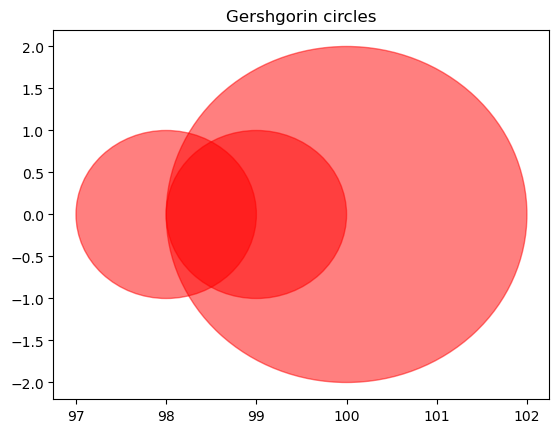

In [56]:
centers  = np.diag(A).astype(complex)
radii = np.sum(np.abs(A - np.diag(centers)), axis = 1)

fig, ax = plt.subplots()
ax.set_title('Gershgorin circles')

for cc, rr in zip(centers, radii):
    # this is dumb but must plot the centers first
    ax.plot([cc.real],[cc.imag])
    ax.add_patch(plt.Circle((cc.real,cc.imag),rr, 
                             color='r', alpha=.5))



---

## Coding the algorithm

- isn't memory efficient for just finding the eigenvector
- since we are going to study convergence it's the best
- and it is **easy to read**.

In [57]:
MAXITER = 1000
EPSILON = 10**-11

# I know how many there will be so don't need a dynamic list
x =  np.zeros((MAXITER + 1, 3))
# initial vector should check not eigenvector
x[0] =  A[0]

for k in range(MAXITER):    
    #iterate
    x[k+1] = A @ x[k]
    # normalise see above
    x[k+1] /= np.linalg.norm(x[k+1])   
    #stopping condition
    if np.linalg.norm(x[k+1] - x[k]) < EPSILON: break
    
vecs = x[:k]

In [60]:
#eigenvalue

vecs[-1]@A@vecs[-1]

100.87938524157182

In [4]:
def pow_meth(A,
            MAXITER = 1000,
            EPSILON = 10**-11):
    
    # I know how many there will be so don't need a dynamic list
    x =  np.zeros((MAXITER + 1,3))
    # initial vector should check not eigenvector
    x[0,0] =  1

    for k in range(MAXITER):    
        #iterate
        x[k+1] = A @ x[k]
        # normalise see above
        x[k+1] /= np.linalg.norm(x[k+1])   
        #stopping condition
        if np.linalg.norm(x[k+1] - x[k]) < EPSILON: break
    else:
        raise ValueError

    return x[:k]

## Memory

low memory use version

In [43]:
MAXITER = 1000
EPSILON = 10**-11

# initial vector should check not eigenvector
# you should program it
x = A[0].astype(float)

for _ in range(MAXITER):    
    x, y = A@x, x
    # normalise 
    x /= np.linalg.norm(x) 
    #stopping condition
    if np.linalg.norm(x - y) < EPSILON: break

# eigenvalue, eigenvector
y@A@y, y


(100.8793852415718, array([0.44909879, 0.84402963, 0.29312841]))


and compare it with **numpy**.

In [227]:
np.linalg.eigvals(A)[0]

100.87938524157187

---

# Convergence

In [7]:
import matplotlib.pyplot as plt

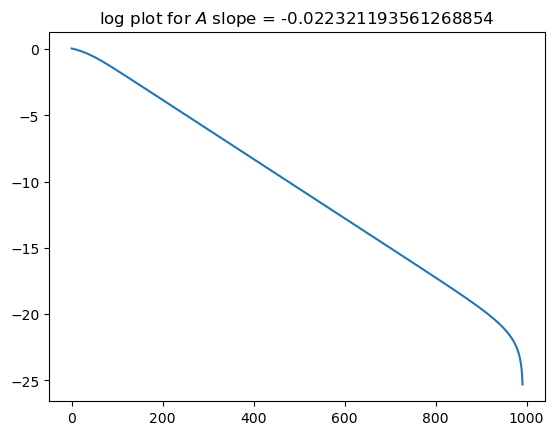

In [58]:
vecs = pow_meth(A )
Y = [np.linalg.norm(v) for v in vecs[:-1] - vecs[-1]]

YY = np.log(Y) 
plt.plot(YY)

# calculate the rate of convergence
a,b = 450,200
slope = (YY[b] - YY[a])/(b-a)
plt.title(f'log plot for $A$ slope = {slope}');

the slope should be 
$\log( \lambda_2/\lambda_1)$.

In [9]:
vv = np.linalg.eig(A)[0]
np.log(vv[1]/vv[0])

-0.022319959154051165

---



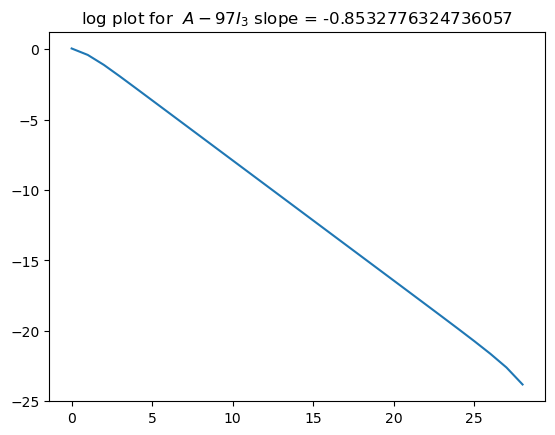

In [10]:
vecs = pow_meth(A - 97*np.identity(3))

Y = np.array([np.linalg.norm(v) for v in vecs[:-1] - vecs[-1]]) 

YY = np.log(Y) 
plt.plot(YY)
a,b = 5,20
slope = (YY[b] - YY[a])/(b-a)
plt.title(f'log plot for  $A - 97I_3$ slope = {slope}');

In [11]:
vv = np.linalg.eig(A - 97*np.identity(3))[0]

np.log(vv[1]/vv[0])

-0.8532641787457773

## Exo 4


In [99]:
A = np.array([99,1,0,2,100,1,0,1,98]).reshape(3,3)  
A, np.linalg.eigvals(A)

(array([[ 99,   1,   0],
        [  2, 100,   1],
        [  0,   1,  98]]),
 array([101.21431974,  98.46081113,  97.32486913]))

In [26]:
def max_eig(A):
    MAXITER = 1000
    EPSILON = 10**-11

    # initial vector should check not eigenvector
    # you should program it
    x = np.random.rand(A.shape[0])

    for _ in range(MAXITER):    
        x, y = A@x, x
        # normalise 
        x /= np.linalg.norm(x) 
        #stopping condition
        if np.linalg.norm(x - y) < EPSILON: break
    else:
        pass
        #raise ValueError
    
    return y

In [119]:
u = max_eig(A)
v = max_eig(A.T)

In [105]:
u,v

(array([0.39597255, 0.87680984, 0.2727824 ]),
 array([0.65310029, 0.72308643, 0.22495784]))

In [7]:
lambda_n = u@A@u
lambda_n

0.3248691294301785

In [8]:
B = A - lambda_n * (v[np.newaxis]* u[np.newaxis].T)  / (u@v)
B

array([[ 1.94073023,  1.04964231, -0.07352991],
       [ 2.09928462,  2.91684263,  1.12317222],
       [-0.14705982,  1.12317222,  0.81755801]])

## better

https://en.wikipedia.org/wiki/Outer_product

In [15]:
B = A - lambda_n * (v[np.newaxis]*u[np.newaxis].T)  / (u@v)
C  = A - lambda_n * np.outer(u,v)  / (u@v)
B - C

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## finding all the eigenvalues


Begin by accelerating the convergence

In [5]:
A = np.array([99,1,0,2,100,1,0,1,98]).reshape(3,3)  - 97 * np.identity(3)
A, np.linalg.eigvals(A) 

(array([[2., 1., 0.],
        [2., 3., 1.],
        [0., 1., 1.]]),
 array([4.21431974, 1.46081113, 0.32486913]))

In [16]:
B = A.copy()
eigs = np.zeros(A.shape[0])
for k in range(A.shape[0]):
    u = max_eig(B)
    v = max_eig(B.T)
    eigs[k] = u@B@u
    B = B - eigs[k] * np.outer(u,v)  / (u@v)

eigs + 97


array([101.21431974,  98.46081113,  97.32486913])

## Pagerank

In [33]:
A = np.zeros((6,6))

A[0,:3] = 0,1,1

A[2] = 1,1,0,0,1,0

A[3,3:] = 0,1,1
A[4,3:] = 1,0,1
A[5,3] = 1
A

array([[0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0.]])

In [36]:
import networkx as nx

def show_graph(adjacency_matrix, my_labels=None):
    
    #rows, cols = np.where(adjacency_matrix == 1)
    #edges = zip(rows.tolist(), cols.tolist())
    # I can't remember where I found this but it's cute
    edges = np.vstack( np.nonzero(adjacency_matrix) ).T
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    pos = nx.spring_layout(gr) 
    
    if not my_labels:
        my_labels = {k : k for k in range(adjacency_matrix.shape[0])} 
    nx.draw(gr, pos, node_size=1000,
            connectionstyle='arc3, rad = 0.2',
            labels=my_labels,
            with_labels=True)
    

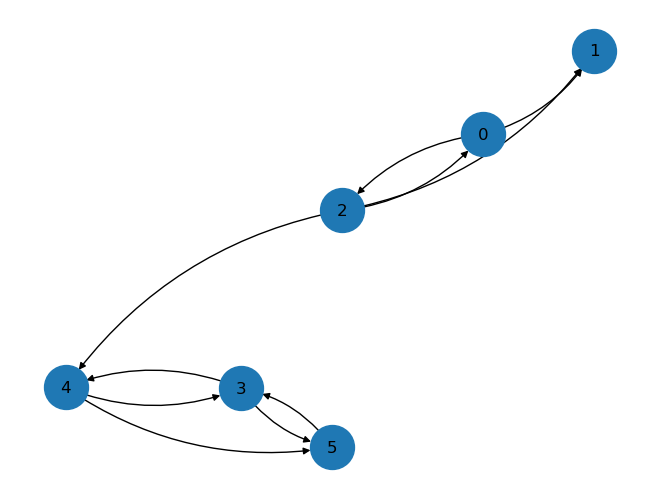

In [40]:
show_graph(A)

In [19]:
np.linalg.eigvals(A)

array([[0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0.]])

In [21]:
for i, L in enumerate(A):
    S = sum(L)
    if S < .1**10: continue
    A[i] /= S

print(A)

[[0.         0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.         0.        ]]


In [24]:
A[1] = np.ones(6)/6
print(A)

[[0.         0.5        0.5        0.         0.         0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.33333333 0.33333333 0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.         0.        ]]


In [25]:
np.linalg.eigvals(A)

array([ 0.67787335, -0.41166499, -0.09954169,  1.        , -0.49999999,
       -0.50000001])

In [27]:
max_eig(A)

array([0.40824829, 0.40824829, 0.40824829, 0.40824829, 0.40824829,
       0.40824829])

In [31]:
vp = max_eig(A.T)
vp

array([1.11721798e-11, 1.94127898e-11, 1.30135738e-11, 7.42781353e-01,
       3.71390676e-01, 5.57086015e-01])

In [32]:
vp[vp < .1**10] = 0
vp

array([0.        , 0.        , 0.        , 0.74278135, 0.37139068,
       0.55708601])